In [ ]:
import numpy as np
from itertools import product

def is_valid_coloring(adj_matrix, coloring):
    """Check if a given coloring is valid (no two adjacent vertices share the same color)."""
    n = len(adj_matrix)
    for i in range(n):
        for j in range(i + 1, n):
            if adj_matrix[i, j] == 1 and coloring[i] == coloring[j]:
                return False
    return True

def find_chromatic_number(adj_matrix):
    """Find the chromatic number by brute force."""
    n = len(adj_matrix)
    for num_colors in range(1, n + 1):  # Try using 1 to n colors
        for coloring in product(range(num_colors), repeat=n):
            if is_valid_coloring(adj_matrix, coloring):
                return num_colors
    return n  # Worst case, n colors are needed

# Define adjacency matrices for various graphs
graph_data = {
    "Triangle Graph (K3)": np.array([[0, 1, 1], # 3
                                      [1, 0, 1],
                                      [1, 1, 0]]),

    "Square Graph (C4)": np.array([[0, 1, 0, 1], # 2
                                    [1, 0, 1, 0],
                                    [0, 1, 0, 1],
                                    [1, 0, 1, 0]]),

    "Star Graph (S3)": np.array([[0, 1, 1, 1], # 2 
                                  [1, 0, 0, 0],
                                  [1, 0, 0, 0],
                                  [1, 0, 0, 0]]),

    "Complete Graph (K5)": np.ones((5, 5)) - np.eye(5), # 5

    "Cycle Graph (C6)": np.array([[0, 1, 0, 0, 0, 1], # 2
                                   [1, 0, 1, 0, 0, 0],
                                   [0, 1, 0, 1, 0, 0],
                                   [0, 0, 1, 0, 1, 0],
                                   [0, 0, 0, 1, 0, 1],
                                   [1, 0, 0, 0, 1, 0]]),

    "Bipartite Graph (K3,3)": np.array([[0, 0, 0, 1, 1, 1], # 2
                                        [0, 0, 0, 1, 1, 1],
                                        [0, 0, 0, 1, 1, 1],
                                        [1, 1, 1, 0, 0, 0],
                                        [1, 1, 1, 0, 0, 0],
                                        [1, 1, 1, 0, 0, 0]])
}

# Compute and print chromatic numbers
for name, matrix in graph_data.items():
    chromatic_num = find_chromatic_number(matrix)
    print(f"{name}:\nAdjacency Matrix:\n{matrix}\nChromatic Number: {chromatic_num}\n{'-'*40}")


Triangle Graph (K3):
Adjacency Matrix:
[[0 1 1]
 [1 0 1]
 [1 1 0]]
Chromatic Number: 3
----------------------------------------
Square Graph (C4):
Adjacency Matrix:
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]
Chromatic Number: 2
----------------------------------------
Star Graph (S3):
Adjacency Matrix:
[[0 1 1 1]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]
Chromatic Number: 2
----------------------------------------
Complete Graph (K5):
Adjacency Matrix:
[[0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0.]]
Chromatic Number: 5
----------------------------------------
Cycle Graph (C6):
Adjacency Matrix:
[[0 1 0 0 0 1]
 [1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]]
Chromatic Number: 2
----------------------------------------
Bipartite Graph (K3,3):
Adjacency Matrix:
[[0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]]
Chromatic Number: 2
----------------------------------------


Generated Graph Instances and their Chromatic Numbers:
----------------------------------------------------------------------
Instance 1:
  Vertices: 8
  Edge Density: 0.68
  Chromatic Number: 8
  Coloring: [0, 1, 2, 3, 4, 5, 6, 7]
  Adjacency Matrix:
[[0 1 1 1 1 1 1 1]
     [1 0 1 1 1 1 1 1]
     [1 1 0 1 1 1 1 1]
     [1 1 1 0 1 1 1 1]
     [1 1 1 1 0 1 1 1]
     [1 1 1 1 1 0 1 1]
     [1 1 1 1 1 1 0 1]
     [1 1 1 1 1 1 1 0]]
----------------------------------------------------------------------
Instance 2:
  Vertices: 5
  Edge Density: 0.42
  Chromatic Number: 3
  Coloring: [0, 1, 0, 2, 1]
  Adjacency Matrix:
[[0 1 0 1 1]
     [1 0 0 1 0]
     [0 0 0 0 1]
     [1 1 0 0 0]
     [1 0 1 0 0]]
----------------------------------------------------------------------
Instance 3:
  Vertices: 9
  Edge Density: 0.52
  Chromatic Number: 7
  Coloring: [0, 1, 2, 3, 4, 5, 2, 0, 6]
  Adjacency Matrix:
[[0 1 1 1 1 1 1 0 1]
     [1 0 1 1 1 1 1 1 1]
     [1 1 0 1 1 1 0 0 1]
     [1 1 1 0 1 1 1 1 1]
 

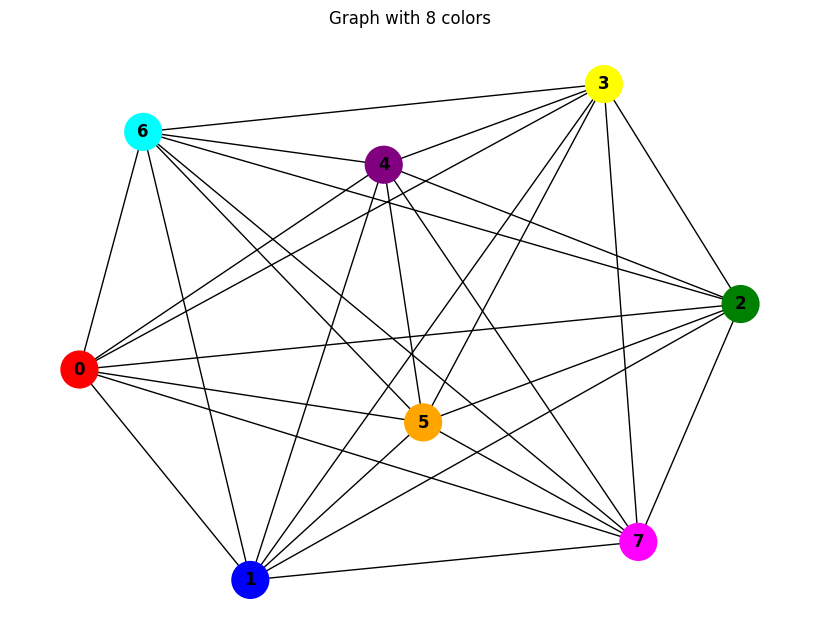

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

def generate_random_adjacency_matrix(n, p=0.5):
    """
    Generate a random symmetric adjacency matrix with n vertices.
    
    Parameters:
    - n: Number of vertices
    - p: Probability of edge creation (default 0.5)
    
    Returns:
    - A symmetric adjacency matrix as a numpy array
    """
    # Generate a random matrix with 1s occurring with probability p
    adj_matrix = np.random.random((n, n)) < p
    
    # Make the matrix symmetric (undirected graph) with no self-loops
    adj_matrix = np.logical_or(adj_matrix, adj_matrix.T)
    np.fill_diagonal(adj_matrix, False)
    
    # Convert boolean to integer (0 and 1)
    return adj_matrix.astype(int)

def is_valid_coloring(graph, coloring):
    """
    Check if a coloring is valid for a graph.
    
    Parameters:
    - graph: Adjacency matrix as numpy array
    - coloring: List of colors (integers) for each vertex
    
    Returns:
    - Boolean indicating if the coloring is valid
    """
    n = len(graph)
    for i in range(n):
        for j in range(i+1, n):
            if graph[i][j] == 1 and coloring[i] == coloring[j]:
                return False  # Adjacent vertices have the same color
    return True

def compute_chromatic_number(graph):
    """
    Compute the chromatic number of a graph using brute force.
    
    Parameters:
    - graph: Adjacency matrix as numpy array
    
    Returns:
    - The chromatic number
    - The valid coloring (as a list)
    """
    n = len(graph)
    
    # Start with 1 color and increase until a valid coloring is found
    for num_colors in range(1, n + 1):
        # Generate all possible colorings with num_colors
        for coloring in product(range(num_colors), repeat=n):
            if is_valid_coloring(graph, coloring):
                return num_colors, list(coloring)
    
    # In theory, we should never reach here as a graph with n vertices
    # can always be colored with at most n colors
    return n, list(range(n))

def visualize_graph_with_coloring(adj_matrix, coloring):
    """
    Visualize a graph with its vertex coloring.
    
    Parameters:
    - adj_matrix: Adjacency matrix as numpy array
    - coloring: List of colors for each vertex
    """
    # Create a networkx graph from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix)
    
    # Position nodes using spring layout
    pos = nx.spring_layout(G)
    
    # Define a colormap
    color_map = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
    
    # Get node colors based on the coloring (map to color_map)
    node_colors = [color_map[c % len(color_map)] for c in coloring]
    
    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_weight='bold')
    plt.title(f'Graph with {max(coloring) + 1} colors')
    plt.show()

# Generate 10 random adjacency matrices and compute their chromatic numbers
np.random.seed(42)  # For reproducibility
instances = []

for i in range(10):
    # Random number of vertices between 5 and 10
    n = np.random.randint(5, 11)
    
    # Random edge density
    p = np.random.uniform(0.3, 0.7)
    
    # Generate adjacency matrix
    adj_matrix = generate_random_adjacency_matrix(n, p)
    
    # Compute chromatic number
    chromatic_number, coloring = compute_chromatic_number(adj_matrix)
    
    instances.append({
        'id': i + 1,
        'vertices': n,
        'edge_density': p,
        'adjacency_matrix': adj_matrix,
        'chromatic_number': chromatic_number,
        'coloring': coloring
    })

# Display the results
print("Generated Graph Instances and their Chromatic Numbers:")
print("-" * 70)

for instance in instances:
    print(f"Instance {instance['id']}:")
    print(f"  Vertices: {instance['vertices']}")
    print(f"  Edge Density: {instance['edge_density']:.2f}")
    print(f"  Chromatic Number: {instance['chromatic_number']}")
    print(f"  Coloring: {instance['coloring']}")
    print(f"  Adjacency Matrix:")
    print(np.array2string(instance['adjacency_matrix'], prefix='    '))
    print("-" * 70)

# Visualize one example
example_id = 0  # Change this to visualize different examples
visualize_graph_with_coloring(
    instances[example_id]['adjacency_matrix'],
    instances[example_id]['coloring']
)

In [4]:
instances

[{'id': 1,
  'vertices': 8,
  'edge_density': 0.6802857225639665,
  'adjacency_matrix': array([[0, 1, 1, 1, 1, 1, 1, 1],
         [1, 0, 1, 1, 1, 1, 1, 1],
         [1, 1, 0, 1, 1, 1, 1, 1],
         [1, 1, 1, 0, 1, 1, 1, 1],
         [1, 1, 1, 1, 0, 1, 1, 1],
         [1, 1, 1, 1, 1, 0, 1, 1],
         [1, 1, 1, 1, 1, 1, 0, 1],
         [1, 1, 1, 1, 1, 1, 1, 0]]),
  'chromatic_number': 8,
  'coloring': [0, 1, 2, 3, 4, 5, 6, 7]},
 {'id': 2,
  'vertices': 5,
  'edge_density': 0.4185094022816329,
  'adjacency_matrix': array([[0, 1, 0, 1, 1],
         [1, 0, 0, 1, 0],
         [0, 0, 0, 0, 1],
         [1, 1, 0, 0, 0],
         [1, 0, 1, 0, 0]]),
  'chromatic_number': 3,
  'coloring': [0, 1, 0, 2, 1]},
 {'id': 3,
  'vertices': 9,
  'edge_density': 0.5245108790277985,
  'adjacency_matrix': array([[0, 1, 1, 1, 1, 1, 1, 0, 1],
         [1, 0, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 0, 1, 1, 1, 0, 0, 1],
         [1, 1, 1, 0, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 0, 1, 1, 0, 1],
         [1, 1,